# S&P500, Bitcoin ETF and Bitcoin Cryptocurrency Risk and Reward Analysis

In [20]:
# Import dependencies and libraries

import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import numpy as np
import hvplot.pandas
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import questionary
from MCForecastTools import MCSimulation
%matplotlib inline
import requests
import os

In [21]:
# Load the environment variables from the .env file
load_dotenv()


True

In [28]:
# Set the variables for the Alpha Advantage API Key
API_Key= os.getenv("API_Key")

### Set up dataframes for each of the asset classes.

*Make AlphaVantage API Calls.* 
*Sort, filter and format dataframes.* 


In [31]:
#Calling AlphaVantage Stock and Cryptocurreny API

SPY_api = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey={API_Key}&datatype=csv'
SPY_df_1 = pd.read_csv(
    SPY_api,
    index_col="timestamp",
    parse_dates=True,
    infer_datetime_format=True).sort_values(by ='timestamp', ascending = 1)

ETF_api = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=BITW&outputsize=full&apikey={API_Key}&datatype=csv'
ETF_df_1 = pd.read_csv(
    ETF_api,
    index_col="timestamp",
    parse_dates=True,
    infer_datetime_format=True).sort_values(by ='timestamp', ascending = 1)

BTC_crypto_api = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&outputsize=full&apikey={API_Key}&datatype=csv'
BTC_df_1 = pd.read_csv(
    BTC_crypto_api, 
    index_col="timestamp",
    parse_dates=True,
    infer_datetime_format=True).sort_values(by ='timestamp', ascending = 1)


In [32]:
#Creating a dataframe with all necessary columns for BTC
BTC_df_2 = BTC_df_1.rename(columns={'low (USD)':'low','high (USD)':'high','open (USD)':'open','close (USD)':'close'})
BTC_df = BTC_df_2.filter(['timestamp', 'close','open','high','low','volume'])
#creating a dataframe with Close column for BTC
BTC_df_close=BTC_df.filter(['close'])

In [33]:
#Calling BTC_df to confirm the dataframe format. 
BTC_df

,close,open,high,low,volume
timestamp,,,,,
2019-06-05,7776.50,7687.04,7896.70,7572.78,48679.656455
2019-06-06,7786.70,7778.08,7868.13,7444.58,36624.118747
2019-06-07,7980.53,7787.57,8100.00,7737.49,33942.225658
2019-06-08,7893.62,7978.94,8044.65,7751.00,22657.329634
2019-06-09,7628.13,7895.28,7935.00,7506.66,31568.465157
...,...,...,...,...,...
2022-02-24,38327.21,37250.02,39843.00,34322.28,120476.294580
2022-02-25,39219.17,38328.68,39683.53,38014.37,56574.571250
2022-02-26,39116.72,39219.16,40348.45,38573.18,29361.256800


In [34]:
#Calling BTC_df_close to confirm the dataframe format. 
BTC_df_close

,close
timestamp,
2019-06-05,7776.50
2019-06-06,7786.70
2019-06-07,7980.53
2019-06-08,7893.62
2019-06-09,7628.13
...,...
2022-02-24,38327.21
2022-02-25,39219.17
2022-02-26,39116.72


In [35]:
#Creating a dataframe with all necessary columns for ETF
ETF_df = ETF_df_1.filter(['timestamp', 'close','open','high','low','volume'])
#creating a dataframe with Close column for ETF
ETF_df_close=ETF_df.filter(['close'])

In [36]:
#Calling ETF_df to confirm the dataframe format. 
ETF_df

,close,open,high,low,volume
timestamp,,,,,
2020-10-15,12.00,12.00,12.00,12.00,100
2020-10-16,12.00,12.00,12.00,12.00,0
2020-10-19,12.00,12.00,12.00,12.00,0
2020-10-20,12.00,12.00,12.00,12.00,0
2020-10-21,12.00,12.00,12.00,12.00,0
...,...,...,...,...,...
2022-02-18,33.00,33.05,33.15,32.02,49753
2022-02-22,30.40,31.88,31.88,30.00,150562
2022-02-23,30.62,31.31,31.31,29.58,70357


In [37]:
#Calling ETF_df_close to confirm the dataframe format. 
ETF_df_close

,close
timestamp,
2020-10-15,12.00
2020-10-16,12.00
2020-10-19,12.00
2020-10-20,12.00
2020-10-21,12.00
...,...
2022-02-18,33.00
2022-02-22,30.40
2022-02-23,30.62


In [38]:
#Creating a dataframe with all necessary columns for SPY
SPY_df = SPY_df_1.filter(['timestamp', 'close','open','high','low','volume'])
#creating a dataframe with Close column for SPY
SPY_df_close=SPY_df.filter(['close'])

In [39]:
#Calling SPY_df to confirm the dataframe format. 
SPY_df

,close,open,high,low,volume
timestamp,,,,,
1999-11-01,135.5625,136.5000,137.0000,135.5625,4006500
1999-11-02,134.5937,135.9687,137.2500,134.5937,6516900
1999-11-03,135.5000,136.0000,136.3750,135.1250,7222300
1999-11-04,136.5312,136.7500,137.3593,135.7656,7907500
1999-11-05,137.8750,138.6250,139.1093,136.7812,7431500
...,...,...,...,...,...
2022-02-18,434.2300,437.3300,438.6600,431.8200,132642896
2022-02-22,429.5700,431.8900,435.5000,425.8600,122145129
2022-02-23,421.9500,432.6600,433.2600,421.3500,132578005


In [40]:
#Calling SPY_df_close to confirm the dataframe format. 
SPY_df_close

,close
timestamp,
1999-11-01,135.5625
1999-11-02,134.5937
1999-11-03,135.5000
1999-11-04,136.5312
1999-11-05,137.8750
...,...
2022-02-18,434.2300
2022-02-22,429.5700
2022-02-23,421.9500


In [41]:
#Combine dataframes of the SPY,ETF and BTC with all their necessary columns into all_portfolio_df.
all_portfolio_df = pd.concat([SPY_df, ETF_df, BTC_df], axis=1, join="inner")
all_portfolio_df

,close,open,high,low,volume,close,open,high,low,volume,close,open,high,low,volume
timestamp,,,,,,,,,,,,,,,
2020-10-15,347.50,343.71,348.0200,343.13,60357659,12.00,12.00,12.00,12.00,100,11505.12,11417.89,11617.34,11250.83,48760.717679
2020-10-16,347.29,348.96,350.7500,347.10,89501868,12.00,12.00,12.00,12.00,0,11319.32,11505.13,11541.15,11200.00,48797.749502
2020-10-19,342.01,348.65,349.3300,341.04,68425614,12.00,12.00,12.00,12.00,0,11751.47,11503.14,11823.99,11407.96,47414.534692
2020-10-20,343.38,343.46,346.8800,342.64,60051880,12.00,12.00,12.00,12.00,0,11909.99,11751.46,12038.38,11677.59,62134.750663
2020-10-21,342.73,343.33,348.6847,342.40,63574979,12.00,12.00,12.00,12.00,0,12780.96,11910.00,13217.68,11886.95,114584.456767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,434.23,437.33,438.6600,431.82,132642896,33.00,33.05,33.15,32.02,49753,39974.44,40515.71,40959.88,39450.00,43845.922410
2022-02-22,429.57,431.89,435.5000,425.86,122145129,30.40,31.88,31.88,30.00,150562,38230.33,37008.16,38429.00,36350.00,53785.945890
2022-02-23,421.95,432.66,433.2600,421.35,132578005,30.62,31.31,31.31,29.58,70357,37250.01,38230.33,39249.93,37036.79,43560.732000


In [42]:
#Combine dataframes of the SPY & ETF with all their necessary columns into SPY_ETF_df.
to_merge_dict = {'SPY': SPY_df , 'ETF': ETF_df}
# Use concat to create a merged dataframe from the dictionary
SPY_ETF_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())
SPY_ETF_df

SPY                                             ETF         \
               close      open      high       low     volume  close   open   
timestamp                                                                     
1999-11-01  135.5625  136.5000  137.0000  135.5625    4006500    NaN    NaN   
1999-11-02  134.5937  135.9687  137.2500  134.5937    6516900    NaN    NaN   
1999-11-03  135.5000  136.0000  136.3750  135.1250    7222300    NaN    NaN   
1999-11-04  136.5312  136.7500  137.3593  135.7656    7907500    NaN    NaN   
1999-11-05  137.8750  138.6250  139.1093  136.7812    7431500    NaN    NaN   
...              ...       ...       ...       ...        ...    ...    ...   
2022-02-18  434.2300  437.3300  438.6600  431.8200  132642896  33.00  33.05   
2022-02-22  429.5700  431.8900  435.5000  425.8600  122145129  30.40  31.88   
2022-02-23  421.9500  432.6600  433.2600  421.3500  132578005  30.62  31.31   
2022-02-24  428.3000  411.0200  428.7600  410.6400  213942946  29.95  29.29   
2022-02-25  437.7500  429.6100  437.8400  427.8600  121804459  30.69  30.12   

                                    
             high    low    volume  
timestamp                           
1999-11-01    NaN    NaN       NaN  
1999-11-02    NaN    NaN       NaN  
1999-11-03    NaN    NaN       NaN  
1999-11-04    NaN    NaN       NaN  
1999-11-05    NaN    NaN       NaN  
...           ...    ...       ...  
2022-02-18  33.15  32.02   49753.0  
2022-02-22  31.88  30.00  150562.0  
2022-02-23  31.31  29.58   70357.0  
2022-02-24  31.29  28.30  117916.0  
2022-02-25  30.80  29.72   50893.0  

[5617 rows x 10 columns]

In [43]:
#Combine dataframes of the SPY & BTC with all their necessary columns into SPY_BTC_df.
to_merge_dict = {'SPY': SPY_df , 'BTC': BTC_df}
# Use concat to create a merged dataframe from the dictionary
SPY_BTC_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())
SPY_BTC_df

SPY                                                  BTC  \
               close      open      high       low       volume     close   
timestamp                                                                   
1999-11-01  135.5625  136.5000  137.0000  135.5625    4006500.0       NaN   
1999-11-02  134.5937  135.9687  137.2500  134.5937    6516900.0       NaN   
1999-11-03  135.5000  136.0000  136.3750  135.1250    7222300.0       NaN   
1999-11-04  136.5312  136.7500  137.3593  135.7656    7907500.0       NaN   
1999-11-05  137.8750  138.6250  139.1093  136.7812    7431500.0       NaN   
...              ...       ...       ...       ...          ...       ...   
2022-02-24  428.3000  411.0200  428.7600  410.6400  213942946.0  38327.21   
2022-02-25  437.7500  429.6100  437.8400  427.8600  121804459.0  39219.17   
2022-02-26       NaN       NaN       NaN       NaN          NaN  39116.72   
2022-02-27       NaN       NaN       NaN       NaN          NaN  37699.07   
2022-02-28       NaN       NaN       NaN       NaN          NaN  37476.77   

                                                        
                open      high       low        volume  
timestamp                                               
1999-11-01       NaN       NaN       NaN           NaN  
1999-11-02       NaN       NaN       NaN           NaN  
1999-11-03       NaN       NaN       NaN           NaN  
1999-11-04       NaN       NaN       NaN           NaN  
1999-11-05       NaN       NaN       NaN           NaN  
...              ...       ...       ...           ...  
2022-02-24  37250.02  39843.00  34322.28  120476.29458  
2022-02-25  38328.68  39683.53  38014.37   56574.57125  
2022-02-26  39219.16  40348.45  38573.18   29361.25680  
2022-02-27  39116.73  39855.70  37000.00   46229.44719  
2022-02-28  37699.08  37802.04  37450.17     904.80905  

[5928 rows x 10 columns]

In [44]:
#Combine dataframes of the SPY,ETF and BTC with their 'Close' column into Portfolio_df.
portfolio_df = pd.concat([SPY_df_close, ETF_df_close, BTC_df_close], axis=1, join="inner")
portfolio_df.columns=['SPY', 'BITW', 'BTC']
portfolio_df

,SPY,BITW,BTC
timestamp,,,
2020-10-15,347.50,12.00,11505.12
2020-10-16,347.29,12.00,11319.32
2020-10-19,342.01,12.00,11751.47
2020-10-20,343.38,12.00,11909.99
2020-10-21,342.73,12.00,12780.96
...,...,...,...
2022-02-18,434.23,33.00,39974.44
2022-02-22,429.57,30.40,38230.33
2022-02-23,421.95,30.62,37250.01


## Analyzing the Performance

In [45]:
# Calculate Daily Returns
portfolio_daily_returns = portfolio_df.pct_change().dropna()
portfolio_daily_returns.describe()


,SPY,BITW,BTC
count,343.000000,343.000000,343.000000
mean,0.000716,0.007953,0.004718
std,0.009189,0.120338,0.047893
min,-0.034179,-0.330983,-0.143751
25%,-0.003832,-0.039084,-0.023136
50%,0.001157,0.000000,0.002915
75%,0.006223,0.031089,0.032379
max,0.024835,1.540833,0.211141


In [46]:
# Plot overlaying hvplot
portfolio_daily_returns.hvplot(
    xlabel = 'Date', 
    ylabel = 'Daily Returns',
    title = "Daily Returns for SPY, BITW, BTC from 10/16/20 to 02/25/22"
)

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [47]:
# Calculate Cumulative Returns using cumprod
cumulative_returns = (1 + portfolio_daily_returns).cumprod()
cumulative_returns

,SPY,BITW,BTC
timestamp,,,
2020-10-16,0.999396,1.000000,0.983851
2020-10-19,0.984201,1.000000,1.021412
2020-10-20,0.988144,1.000000,1.035190
2020-10-21,0.986273,1.000000,1.110893
2020-10-22,0.991683,1.000000,1.127196
...,...,...,...
2022-02-18,1.249583,2.750000,3.474491
2022-02-22,1.236173,2.533333,3.322897
2022-02-23,1.214245,2.551667,3.237690


In [48]:
# Plot Cumulative Returns
cumulative_returns.hvplot(figsize = (10, 7), xlabel = 'Date', ylabel = 'Cumulative Returns', title = "Cumulative Returns for SPY, BITW, BTC from 10/16/20 to 02/25/22")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [49]:
# Generate summary statistics for the `daily_returns_df` DataFrame
portfolio_daily_returns.describe()

,SPY,BITW,BTC
count,343.000000,343.000000,343.000000
mean,0.000716,0.007953,0.004718
std,0.009189,0.120338,0.047893
min,-0.034179,-0.330983,-0.143751
25%,-0.003832,-0.039084,-0.023136
50%,0.001157,0.000000,0.002915
75%,0.006223,0.031089,0.032379
max,0.024835,1.540833,0.211141


### Analyze the Volatility

Analyze the volatility of portfolios and of the S&P 500 Index by using box plots.

In [50]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
portfolio_daily_returns.hvplot(
    kind = "box", 
    title = "Box Plot of Daily Returns"
)

:BoxWhisker   [Variable]   (value)

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [51]:
# Calculate and sort the standard deviation for all 3 portfolios including SPY,ETF and BTC
# Review the standard deviations sorted smallest to largest
portfolio_daily_std_dv = portfolio_daily_returns.std()
portfolio_daily_std_dv


SPY     0.009189
BITW    0.120338
BTC     0.047893
dtype: float64

In [52]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 3 portfolios including SPY,ETF and BTC
# Review the annual standard deviations smallest to largest
portfolio_annualized_std_dv = portfolio_daily_std_dv * np.sqrt(252)
portfolio_annualized_std_dv

SPY     0.145863
BITW    1.910314
BTC     0.760274
dtype: float64

In [53]:
# Using the daily returns DataFrame and a 30-day rolling window, 
# plot the rolling standard deviation of the 1 ETF, Cryptocurrency and the S&P 500
portfolio_annualized_std_dv_21roll = portfolio_daily_returns.rolling(window=21).std()
portfolio_annualized_std_dv_21roll.hvplot(title="Portfolio 21-Day Rolling Standard Deviations")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

In [54]:
# Use 126 as the number of trading days in 1/2 a year
year_trading_days = 126

# Calculate the annual average return data for the for fund portfolios and the S&P 500
portfolio_annual_avg_return = portfolio_daily_returns.mean() * year_trading_days

# Review the annual average returns sorted from lowest to highest
portfolio_annual_avg_return.sort_values(inplace=True)
portfolio_annual_avg_return

SPY     0.090155
BTC     0.594487
BITW    1.002030
dtype: float64

In [55]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharpe_ratios = portfolio_annual_avg_return/portfolio_annualized_std_dv


# Review the Sharpe ratios 
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

BITW    0.524537
SPY     0.618078
BTC     0.781938
dtype: float64

In [56]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.hvplot.bar(title = "Sharpe Ratios")

:Bars   [index]   (0)

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

In [57]:
# Calculate the variance of the S&P 500 ETF and BTC using a rolling 30-day window.
portfolio_var = portfolio_daily_returns.rolling(window=30).var().dropna()

portfolio_var.tail()

,SPY,BITW,BTC
timestamp,,,
2022-02-18,0.000161,0.003244,0.001525
2022-02-22,0.000164,0.003430,0.001547
2022-02-23,0.000171,0.003434,0.001563
2022-02-24,0.000177,0.003244,0.001577
2022-02-25,0.000197,0.003233,0.001568


In [58]:
# Calculate the covariance using a 30-day rolling window against the SPY
portfolio_covariance_rolling_30 = portfolio_daily_returns.rolling(window=30).cov(portfolio_daily_returns['SPY'])

# Review last 5 rows of the covariance data
portfolio_covariance_rolling_30.tail()

,SPY,BITW,BTC
timestamp,,,
2022-02-18,0.000161,0.000362,0.000250
2022-02-22,0.000164,0.000382,0.000260
2022-02-23,0.000171,0.000377,0.000271
2022-02-24,0.000177,0.000334,0.000281
2022-02-25,0.000197,0.000354,0.000297


In [59]:
# Calculate the beta based on the 30-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
portfolio_beta_30_roll = (portfolio_covariance_rolling_30 / portfolio_var)
portfolio_beta_30_roll.tail()

,SPY,BITW,BTC
timestamp,,,
2022-02-18,1.0,0.111459,0.163660
2022-02-22,1.0,0.111403,0.167924
2022-02-23,1.0,0.109738,0.173462
2022-02-24,1.0,0.103017,0.177984
2022-02-25,1.0,0.109541,0.189567


In [60]:
# Calculate the average of the 30-day rolling beta
portfolio_avg_beta_30_rolling = portfolio_beta_30_roll.mean()
portfolio_avg_beta_30_rolling.sort_values(inplace=True)
portfolio_avg_beta_30_rolling

BITW    0.040273
BTC     0.053792
SPY     1.000000
dtype: float64

In [61]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
portfolio_avg_beta_30_rolling.hvplot.bar(
    xlabel='Asset',
    ylabel='Beta',
    title='S&P500 BITW and BTC : 30-Day Average Rolling Beta'
)

:Bars   [index]   (0)

# Financial Analysis and Monte Carlo Simulation

In [62]:
# Configure a Monte Carlo simulation to forecast 3 years cumulative returns
# The weights should be split 40% to SPY and 60% to ETF.
# Run 500 samples.
MC_3_year_SPY_ETF = MCSimulation(
    portfolio_data = SPY_ETF_df.dropna(),
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*3)

# Review the simulation input data
MC_3_year_SPY_ETF.portfolio_data.tail()

SPY                                                    ETF  \
             close    open    high     low     volume daily_return  close   
timestamp                                                                   
2022-02-18  434.23  437.33  438.66  431.82  132642896    -0.006475  33.00   
2022-02-22  429.57  431.89  435.50  425.86  122145129    -0.010732  30.40   
2022-02-23  421.95  432.66  433.26  421.35  132578005    -0.017739  30.62   
2022-02-24  428.30  411.02  428.76  410.64  213942946     0.015049  29.95   
2022-02-25  437.75  429.61  437.84  427.86  121804459     0.022064  30.69   

                                                        
             open   high    low    volume daily_return  
timestamp                                               
2022-02-18  33.05  33.15  32.02   49753.0    -0.011976  
2022-02-22  31.88  31.88  30.00  150562.0    -0.078788  
2022-02-23  31.31  31.31  29.58   70357.0     0.007237  
2022-02-24  29.29  31.29  28.30  117916.0    -0.021881  
2022-02-25  30.12  30.80  29.72   50893.0     0.024708

In [63]:
# Run the Monte Carlo simulation to forecast 3 years cumulative returns for SPY and ETF.
MC_3_year_SPY_ETF.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sainaazimi/Desktop/Group_project/Crypto-ETF/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.936469,0.973361,1.026355,0.934021,1.031834,0.981350,1.043052,0.963811,0.877740,1.138865,...,1.024303,0.973458,0.997907,1.054046,0.812160,0.974830,0.990488,0.975161,0.993448,1.143697
2,0.909655,1.006039,0.990027,0.940790,1.045585,1.150915,1.111757,0.856473,1.039793,1.106767,...,0.911476,1.033010,1.031236,1.068198,0.777792,1.035203,1.050265,0.894810,1.032468,1.153557
3,0.936529,0.975728,0.967075,0.932771,1.081149,1.136029,1.119056,0.895050,0.952294,1.074312,...,0.884645,1.108719,1.181051,1.147598,0.846470,0.967980,0.858389,0.986720,1.022062,1.124446
4,0.912973,0.902137,0.944702,0.967913,1.128375,0.991398,1.204110,0.950688,0.973638,1.058293,...,0.866040,1.246309,1.224499,1.126174,0.841152,0.987097,0.830179,0.983705,1.059879,1.201365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.411119,3.039714,15.582049,5.732256,27.412280,0.287150,62.502697,7.345956,23.594130,1.281839,...,0.180088,4.002637,0.172594,2.537958,2.165233,0.768787,0.488538,5.181235,2.159100,1.660335
753,0.451412,3.279062,15.763915,5.384823,25.813438,0.291906,67.891002,7.113072,25.009698,1.237728,...,0.170159,4.064975,0.188801,2.220839,1.958104,0.719218,0.591336,4.714130,2.023531,1.668935
754,0.478412,3.112474,16.245006,4.998092,28.743563,0.310473,62.026711,7.766343,23.201288,1.176536,...,0.164349,4.242589,0.196642,2.334682,1.796910,0.697106,0.574802,5.142452,2.165973,1.848602
755,0.461782,3.389168,14.425011,5.129535,28.252143,0.289261,65.399503,8.038282,26.168257,1.235749,...,0.162807,3.961856,0.206458,2.661296,1.979212,0.704529,0.595350,5.778068,2.095506,1.781321


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

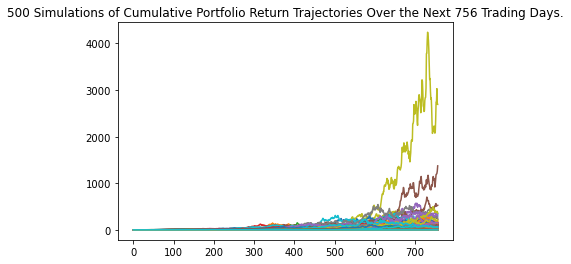

In [64]:
# Visualize the 3-year Monte Carlo simulation by creating an overlay line plot of SPY and ETF.
MC_3_year_SPY_ETF.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

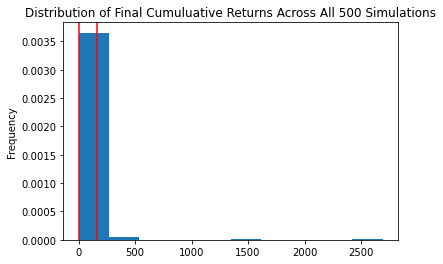

In [65]:
# Visualize the probability distribution of the 3-year Monte Carlo simulation by plotting a histogram of SPY and ETF.
MC_3_year_SPY_ETF.plot_distribution()

In [66]:
# Generate summary statistics from the 3-year Monte Carlo simulation results for ETF and SPY.
SPY_ETF_summary_3=MC_3_year_SPY_ETF.summarize_cumulative_return()

# Review the 3-year Monte Carlo summary statistics
display(SPY_ETF_summary_3, SPY_ETF_summary_3["mean"])

count            500.000000
mean              34.777756
std              143.407832
min                0.017857
25%                1.818000
50%                7.585638
75%               29.426042
max             2692.673466
95% CI Lower       0.136359
95% CI Upper     164.865547
Name: 756, dtype: float64

34.77775556686147

In [67]:
#Calculating the final investment amount with initial investment of $100 for 3-years in ETF and SPY
SPY_ETF_percent_change_3 = (SPY_ETF_summary_3["mean"])
initial_investment = 100
final_SPY_ETF_investment_3=initial_investment*SPY_ETF_percent_change_3
final_SPY_ETF_investment_3
print(f"if you invest in SPY and ETF with 40%,60% with 100 dollars in 3 years you would have ${final_SPY_ETF_investment_3:.2f}")

if you invest in SPY and ETF with 40%,60% with 100 dollars in 3 years you would have $3477.78


In [69]:
# Configure a Monte Carlo simulation to forecast 3 years cumulative returns
# The weights should be split 40% to SPY and 60% to BTC.
# Run 500 samples.
MC_3_year_SPY_BTC = MCSimulation(
    portfolio_data = SPY_BTC_df.dropna(),
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*3)

# Review the simulation input data
MC_3_year_SPY_BTC.portfolio_data.tail()

SPY                                                    \
             close    open    high     low       volume daily_return   
timestamp                                                              
2022-02-18  434.23  437.33  438.66  431.82  132642896.0    -0.006475   
2022-02-22  429.57  431.89  435.50  425.86  122145129.0    -0.010732   
2022-02-23  421.95  432.66  433.26  421.35  132578005.0    -0.017739   
2022-02-24  428.30  411.02  428.76  410.64  213942946.0     0.015049   
2022-02-25  437.75  429.61  437.84  427.86  121804459.0     0.022064   

                 BTC                                                           
               close      open      high       low        volume daily_return  
timestamp                                                                      
2022-02-18  39974.44  40515.71  40959.88  39450.00   43845.92241    -0.013359  
2022-02-22  38230.33  37008.16  38429.00  36350.00   53785.94589    -0.043631  
2022-02-23  37250.01  38230.33  39249.93  37036.79   43560.73200    -0.025642  
2022-02-24  38327.21  37250.02  39843.00  34322.28  120476.29458     0.028918  
2022-02-25  39219.17  38328.68  39683.53  38014.37   56574.57125     0.023272

In [70]:
# Run the Monte Carlo simulation to forecast 3 years cumulative returns for SPY and BTC.
MC_3_year_SPY_BTC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sainaazimi/Desktop/Group_project/Crypto-ETF/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.970870,1.036256,1.037260,0.991567,1.016602,1.011749,1.017389,0.985376,0.990050,0.993011,...,1.014194,0.968783,1.056974,1.023000,0.968109,0.928513,0.986383,0.976440,1.023855,1.015674
2,0.953118,1.017952,1.002011,1.030321,1.033908,1.022077,1.065046,1.025861,0.970458,0.962904,...,0.952491,0.950672,1.002516,1.036700,0.994116,0.928975,0.972112,0.962982,1.020996,1.083781
3,0.916251,0.972006,1.018130,0.999617,1.049004,1.031688,1.070574,1.003619,1.031737,0.960892,...,0.937801,0.928345,0.983655,1.048143,0.960861,0.941220,0.950598,0.991042,1.049316,1.078246
4,0.922318,0.994504,1.015178,0.986926,1.019563,1.062017,1.069914,1.022313,1.018666,0.991845,...,0.937198,0.968128,1.050401,1.090673,0.951965,0.901577,0.990021,0.995055,1.026400,1.070938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,5.831446,2.072420,3.359895,4.101675,3.819617,28.702258,24.613055,10.960121,2.063978,0.533783,...,9.544331,4.239828,2.193358,5.267660,4.331513,2.925607,9.617458,2.063368,6.105185,6.995056
753,5.944530,2.068114,3.456289,4.112834,3.901458,28.162515,24.041919,10.949464,2.090526,0.551173,...,9.846823,4.383019,2.325165,5.436801,4.373897,2.914764,9.624157,2.215193,6.279977,6.797014
754,5.944135,2.065979,3.500105,4.208371,3.964155,29.766646,23.865778,11.445484,2.131943,0.577323,...,10.136198,4.401653,2.400144,5.368252,4.454206,2.924472,9.476332,2.161423,6.211020,6.651386
755,5.837098,2.049086,3.602585,4.219390,3.998806,30.470112,24.506885,11.182130,2.147276,0.579984,...,9.923351,4.675747,2.374271,5.323060,4.246351,3.052002,9.324737,2.106518,6.242266,6.789643


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

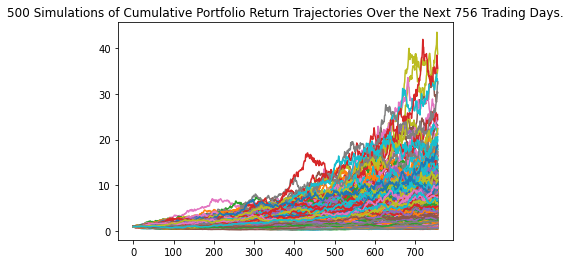

In [71]:
# Visualize the 3-year Monte Carlo simulation by creating an overlay line plot of SPY and BTC.
MC_3_year_SPY_BTC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

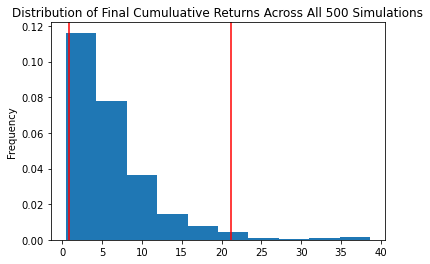

In [72]:
# Visualize the probability distribution of the 3-year Monte Carlo simulation by plotting a histogram of SPY and BTC. 
MC_3_year_SPY_BTC.plot_distribution()

In [73]:
# Generate summary statistics from the 3-year Monte Carlo simulation results for BTC and SPY.
SPY_BTC_summary_3=MC_3_year_SPY_BTC.summarize_cumulative_return()

# Review the 3-year Monte Carlo summary statistics
display(SPY_BTC_summary_3,SPY_BTC_summary_3["mean"])

count           500.000000
mean              6.350577
std               5.485825
min               0.449880
25%               2.635489
50%               4.838335
75%               8.266985
max              38.650401
95% CI Lower      0.844874
95% CI Upper     21.158723
Name: 756, dtype: float64

6.35057670345409

In [74]:
#Calculating the final investment amount with initial investment of $100 for 3-years in BTC and SPY
SPY_BTC_percent_change_3 = (SPY_BTC_summary_3["mean"])
initial_investment = 100
final_SPY_BTC_investment_3=initial_investment*SPY_BTC_percent_change_3
final_SPY_BTC_investment_3
print(f"if you invest in SPY and BTC with 40%,60% with 100 dollars in 3 years you would have ${final_SPY_BTC_investment_3:.2f}")

if you invest in SPY and BTC with 40%,60% with 100 dollars in 3 years you would have $635.06


In [75]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 40% to SPY and 60% to ETF.
# Run 500 samples.
MC_10_year_SPY_ETF = MCSimulation(
    portfolio_data = SPY_ETF_df.dropna(),
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*10)

# Review the simulation input data
MC_10_year_SPY_ETF.portfolio_data.tail()

SPY                                                    ETF  \
             close    open    high     low     volume daily_return  close   
timestamp                                                                   
2022-02-18  434.23  437.33  438.66  431.82  132642896    -0.006475  33.00   
2022-02-22  429.57  431.89  435.50  425.86  122145129    -0.010732  30.40   
2022-02-23  421.95  432.66  433.26  421.35  132578005    -0.017739  30.62   
2022-02-24  428.30  411.02  428.76  410.64  213942946     0.015049  29.95   
2022-02-25  437.75  429.61  437.84  427.86  121804459     0.022064  30.69   

                                                        
             open   high    low    volume daily_return  
timestamp                                               
2022-02-18  33.05  33.15  32.02   49753.0    -0.011976  
2022-02-22  31.88  31.88  30.00  150562.0    -0.078788  
2022-02-23  31.31  31.31  29.58   70357.0     0.007237  
2022-02-24  29.29  31.29  28.30  117916.0    -0.021881  
2022-02-25  30.12  30.80  29.72   50893.0     0.024708

In [76]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns for SPY and ETF
MC_10_year_SPY_ETF.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sainaazimi/Desktop/Group_project/Crypto-ETF/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
1,1.106406,1.087898,1.065281,1.042183,1.113310,0.903130,1.004310,0.963101,1.034185,0.979589,...,1.016813e+00,0.968983,0.995208,1.021015,0.945567,0.900584,1.047896,0.999882,9.993359e-01,1.031852
2,1.111465,1.148162,1.089164,0.957948,1.039383,0.932076,1.088113,0.998465,1.013245,1.063456,...,1.014667e+00,0.938246,1.045188,0.977009,0.869611,0.872769,0.978129,1.081890,1.020484e+00,1.090560
3,1.327989,1.138742,1.155929,0.948889,1.109559,0.951591,1.073818,0.972150,1.020519,1.070870,...,1.062783e+00,0.959749,0.958383,0.925399,0.856464,0.858548,0.989345,0.981577,1.076193e+00,1.156065
4,1.274585,1.101197,1.045964,0.850583,1.139562,0.997595,1.159937,0.974956,0.824784,1.122573,...,1.113034e+00,1.020241,0.954178,0.914485,0.885095,0.940455,1.011212,0.999787,1.010294e+00,1.203204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,81.451134,19.561751,142.593125,139269.481733,49847.851537,5622.256484,81076.720424,12.632531,680.752093,3000.562341,...,4.261486e+06,22864.715591,13846.184074,220.203072,596.784646,83.973751,101.501021,31668.225321,1.366521e+06,8.369093
2517,90.536871,19.792810,141.442410,134087.274361,45637.313860,5740.257502,76157.498691,12.683951,668.255660,2769.239495,...,4.183497e+06,22396.348088,13946.473032,188.392047,678.241982,77.639107,91.758989,33251.833133,1.277354e+06,7.925811
2518,93.717377,19.570167,170.541521,142467.267903,37249.560435,5386.072457,78866.003839,11.613828,673.984492,2953.223308,...,4.289234e+06,21527.124848,12808.252296,201.371050,707.365255,81.866732,89.267346,33503.094475,1.183515e+06,7.911995
2519,101.260668,19.466149,156.846330,155996.433733,37312.547277,6118.590041,78979.312973,11.385568,609.925960,3266.296045,...,5.122212e+06,20522.637402,12517.609184,228.978130,652.239101,85.955249,93.962158,33424.877944,1.236898e+06,7.912964


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

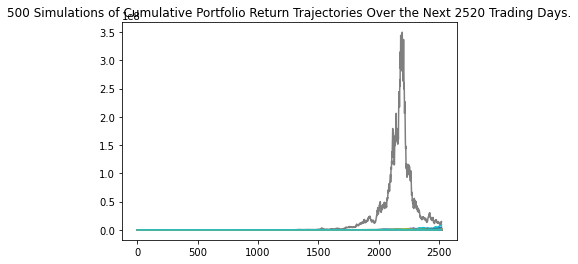

In [77]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot for SPY and ETF
MC_10_year_SPY_ETF.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

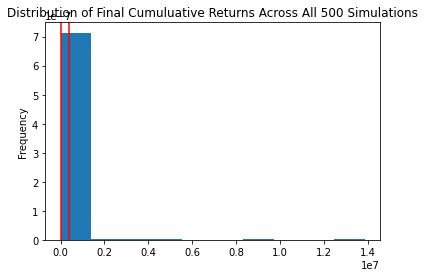

In [78]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram for SPY and ETF
MC_10_year_SPY_ETF.plot_distribution()

In [79]:
# Generate summary statistics from the 10-year Monte Carlo simulation results for SPY and ETF
SPY_ETF_summary_10=MC_10_year_SPY_ETF.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(SPY_ETF_summary_10,SPY_ETF_summary_10["mean"])

count           5.000000e+02
mean            9.425652e+04
std             7.904404e+05
min             8.781177e-03
25%             3.515235e+01
50%             4.137143e+02
75%             6.074463e+03
max             1.384915e+07
95% CI Lower    2.737163e-01
95% CI Upper    4.078434e+05
Name: 2520, dtype: float64

94256.52027430703

In [80]:
#Calculating the final investment amount with initial investment of $100 for 10-years in ETF and SPY
SPY_ETF_percent_change_10= (SPY_ETF_summary_10["mean"])
initial_investment = 100
final_SPY_ETF_investment_10=initial_investment*SPY_ETF_percent_change_10
final_SPY_ETF_investment_10
#print statement
print(f"if you invest in SPY and ETF with 40%,60% with 100 dollars for 10 years you would have ${final_SPY_ETF_investment_10:.2f}")

if you invest in SPY and ETF with 40%,60% with 100 dollars for 10 years you would have $9425652.03


In [81]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 40% to SPY and 60% to BTC.
# Run 500 samples.
MC_10_year_SPY_BTC = MCSimulation(
    portfolio_data = SPY_BTC_df.dropna(),
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*10)

# Review the simulation input data
MC_10_year_SPY_BTC.portfolio_data.tail()

SPY                                                    \
             close    open    high     low       volume daily_return   
timestamp                                                              
2022-02-18  434.23  437.33  438.66  431.82  132642896.0    -0.006475   
2022-02-22  429.57  431.89  435.50  425.86  122145129.0    -0.010732   
2022-02-23  421.95  432.66  433.26  421.35  132578005.0    -0.017739   
2022-02-24  428.30  411.02  428.76  410.64  213942946.0     0.015049   
2022-02-25  437.75  429.61  437.84  427.86  121804459.0     0.022064   

                 BTC                                                           
               close      open      high       low        volume daily_return  
timestamp                                                                      
2022-02-18  39974.44  40515.71  40959.88  39450.00   43845.92241    -0.013359  
2022-02-22  38230.33  37008.16  38429.00  36350.00   53785.94589    -0.043631  
2022-02-23  37250.01  38230.33  39249.93  37036.79   43560.73200    -0.025642  
2022-02-24  38327.21  37250.02  39843.00  34322.28  120476.29458     0.028918  
2022-02-25  39219.17  38328.68  39683.53  38014.37   56574.57125     0.023272

In [82]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns for SPY and BTC
MC_10_year_SPY_BTC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sainaazimi/Desktop/Group_project/Crypto-ETF/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.046738,1.037154,0.981021,0.989365,0.987159,0.969471,1.027589,0.969500,1.030667,1.056816,...,1.014210,1.022518,0.948633,1.024722,1.019427,0.982593,0.970318,0.958695,0.973985,0.951070
2,1.012442,1.006961,0.960914,1.005837,1.000209,0.944318,1.025901,0.959362,1.007351,1.008645,...,0.990730,1.022515,0.922119,1.044483,1.046548,0.968945,1.000796,0.995195,0.973100,0.915359
3,0.979354,1.016503,0.989061,0.979329,1.040107,0.900804,1.045242,1.001944,0.977471,0.990429,...,0.979596,0.993639,0.922906,1.083160,1.080226,0.950989,1.015540,0.994615,0.957411,0.922185
4,0.965843,1.017172,0.987244,0.995095,1.077150,0.869961,1.031796,0.981770,1.008062,0.969474,...,0.955557,1.037240,0.962303,1.105957,1.112096,0.942710,1.003232,0.970486,0.940354,0.933355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,18.031538,114.189066,94.339287,3661.215336,10.108805,25.594003,222.311954,17.846853,116.036211,794.776990,...,158.522628,826.060444,49.407892,295.662248,35.778782,838.653128,2798.317545,38.284103,89.787998,42.293211
2517,18.863397,115.327913,95.366594,3538.799289,10.163605,26.284463,227.731719,17.858326,114.235570,804.728649,...,160.043577,794.780537,47.419123,310.469909,36.196006,857.391869,2852.829909,36.865185,90.513936,43.110824
2518,19.123301,110.745285,96.759386,3573.245916,10.069902,25.924310,236.307789,16.881967,114.948849,815.184911,...,158.360999,777.772089,47.219275,310.027896,35.805467,868.285502,2898.904380,36.732949,87.831962,42.843570
2519,19.276453,110.972851,99.856238,3663.451637,10.019854,24.422310,237.648931,16.870146,111.184142,809.463187,...,158.169819,787.993836,48.169670,319.639007,36.675959,864.182203,2792.012130,34.630711,87.242556,41.268768


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

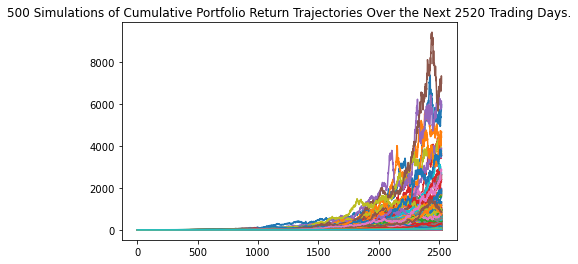

In [83]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot for SPY and BTC
MC_10_year_SPY_BTC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

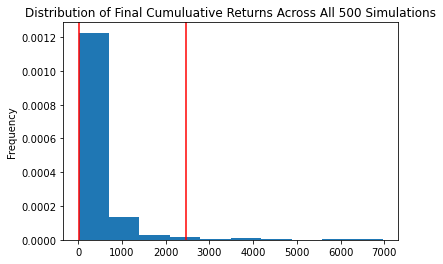

In [84]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram for SPY and BTC
MC_10_year_SPY_BTC.plot_distribution()

In [85]:
# Generate summary statistics from the 10-year Monte Carlo simulation results for SPY and BTC
SPY_BTC_summary_10=MC_10_year_SPY_BTC.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(SPY_BTC_summary_10,SPY_BTC_summary_10["mean"])

count            500.000000
mean             396.787500
std              746.552335
min                4.031752
25%               60.107781
50%              151.914610
75%              408.477486
max             6970.269629
95% CI Lower       8.556258
95% CI Upper    2461.095992
Name: 2520, dtype: float64

396.78749970600956

In [86]:
#Calculating the final investment amount with initial investment of $100 for 10-years in BTC and SPY
SPY_BTC_percent_change_10 = (SPY_BTC_summary_10["mean"])
initial_investment = 100
final_SPY_BTC_investment_10=initial_investment*SPY_BTC_percent_change_10
final_SPY_BTC_investment_10
#Print statement
print(f"If you invest in SPY and BTC with 40%,60% with 100 dollars in 10 years you would have ${final_SPY_BTC_investment_10:.2f}")

If you invest in SPY and BTC with 40%,60% with 100 dollars in 10 years you would have $39678.75
